In [19]:
from matplotlib import pyplot as plt
import sympy as sp
sp.init_printing()
plt.style.use('seaborn-deep')
plt.rcParams['figure.dpi'] = 140
f, mu, delta, l, p_dc, p_opt, f, eta, n = sp.symbols(r'f \mu \delta l p_{dc} p_{opt} f \eta n')

In [20]:
approx_values = {
    r'\mu': 1,
    'f': 1,
    r'\delta': 0.2,
    'l': 1,
    r'p_{dc}': 0.02,
    r'p_{opt}': 0.01,
    r'\eta': 0.2
}
variables = {
    r'\mu': mu,
    'f': f,
    r'\delta': delta,
    'l': l,
    r'p_{dc}': p_dc,
    r'p_{opt}': p_opt,
    r'\eta': eta
}

In [3]:
def pop_in_place(d, k):
    return {key: d[key] for key in d.keys() if key != k}

**Key generation rate:**

$$R=\dfrac 12 f (\mu t \eta + 2p_{dc})$$

**Error rate:**

$$E=\dfrac{p_{dc} + p_{opt} n t \eta}{2 p_{dc} + n t \eta}$$

In [21]:
t = 10 ** (-l * delta / 10)
t

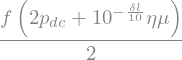

In [22]:
R = f * (mu*t*eta+2*p_dc) / 2
R

In [23]:
E = (p_dc + p_opt * n * t * eta) / (2 * p_dc + n * t * eta)

In [24]:
def plot_for_key(key, key_range, title='', show=True):
    subs = pop_in_place(approx_values, key)
    if subs.get('\mu') is not None:
        subs['n'] = subs['\mu']
    plot = sp.plotting.plot(R.evalf(subs=subs), E.evalf(subs=subs), (variables[key], *key_range), xlabel=f'${key}$', ylabel='', show=False, title=title or f'$R$ and $E$ vs. ${key}$')
    plot[1].line_color = 'r'
    if show:
        plot.show()
    return plot

In [25]:
plot_for_key(r'\mu', (0.5, 3))

ValueError: The same variable should be used in all univariate expressions being plotted.

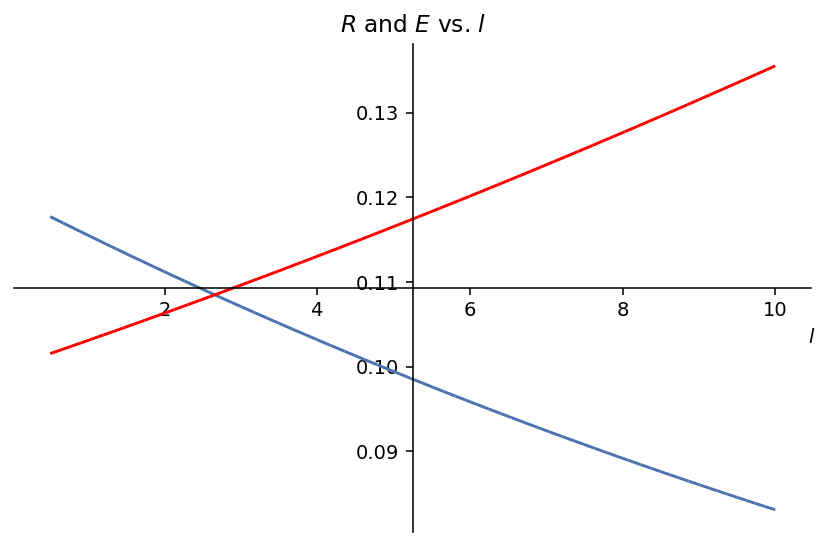

In [9]:
plot_for_key(r'l', (0.5, 10))

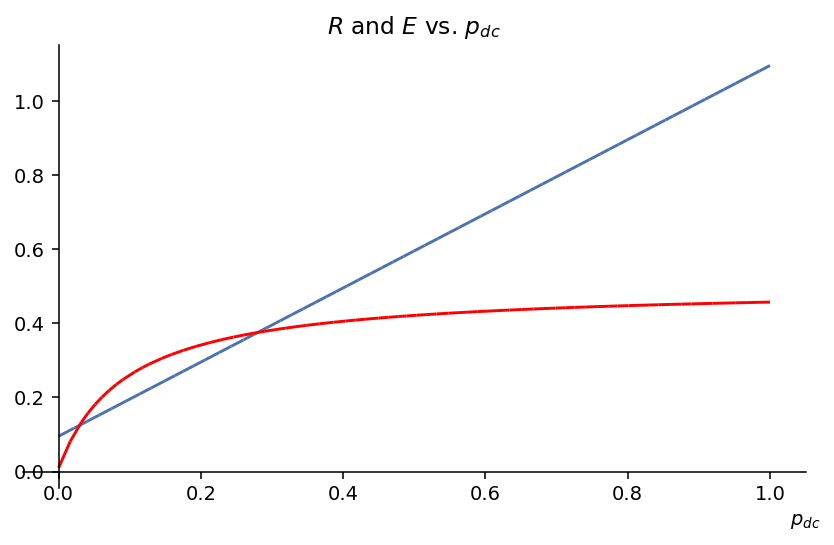

In [18]:
plot_for_key(r'p_{dc}', (0, 1))

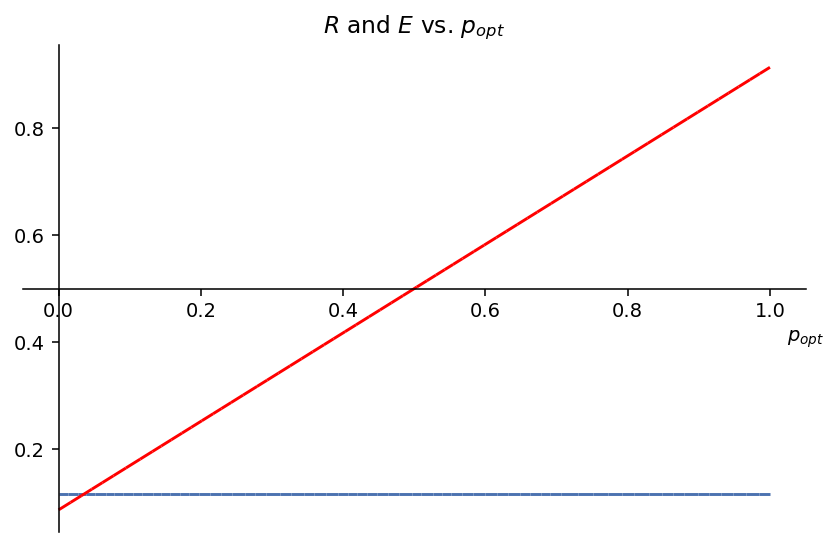

In [11]:
plot_for_key(r'p_{opt}', (0, 1))

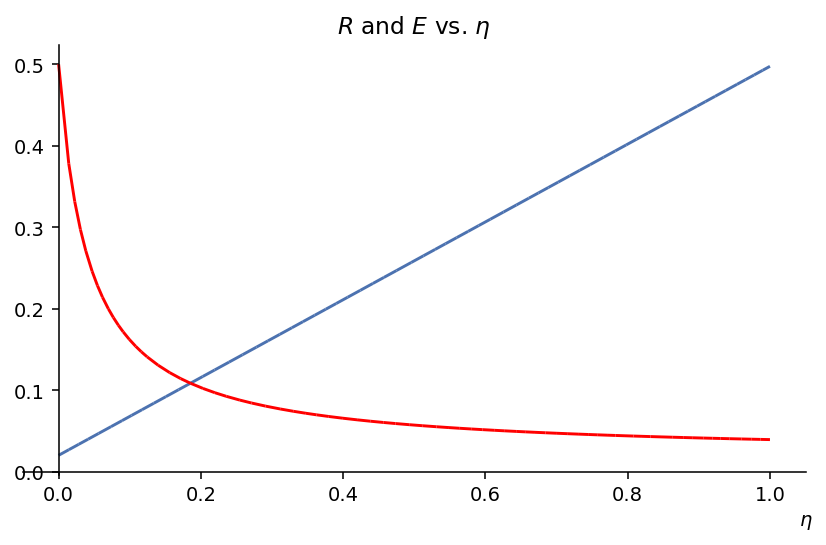

In [12]:
plot_for_key(r'\eta', (0, 1))

In [ ]:
h = lambda p: - (p * sp.log(p, 2) + (1 - p) * sp.log(1 - p, 2))
R_sec = R * (- h  (E))